In [1]:
from fastai.data.all import *
from fastai.vision.all import *
import matplotlib.pyplot as plt
import common

In [2]:
path = Path("./target")
fnames = get_image_files(path)

In [3]:
def get_y(fname):
    fname = fname.with_suffix('.csv')
    return [c for xs in common.get_y(fname) for x in xs for c in x]

In [4]:
blocks = (ImageBlock, PointBlock)
splitter = TrainTestSplitter(test_size=.2)
dblock = DataBlock(blocks=blocks, get_items=get_image_files, get_y=get_y, splitter=splitter)

In [5]:
dsets = dblock.datasets(path)
dblock.summary(path)

Setting-up type transforms pipelines
Found 2048 items
2 datasets of sizes 1638,410
Setting up Pipeline: PILBase.create
Setting up Pipeline: get_y -> TensorPoint.create

Building one sample
  Pipeline: PILBase.create
    starting from
      target\1507.bmp
    applying PILBase.create gives
      PILImage mode=RGB size=256x256
  Pipeline: get_y -> TensorPoint.create
    starting from
      target\1507.bmp
    applying get_y gives
      [128.40384623118436, 191.99163853719733, 38.32455212635375, 183.17569992718919, 47.1404907363619, 93.0964058223586, 137.2197848411925, 101.91234443236675]
    applying TensorPoint.create gives
      TensorPoint of size 4x2

Final sample: (PILImage mode=RGB size=256x256, TensorPoint([[128.4038, 191.9916],
             [ 38.3246, 183.1757],
             [ 47.1405,  93.0964],
             [137.2198, 101.9123]]))


Found 2048 items
2 datasets of sizes 1638,410
Setting up Pipeline: PILBase.create
Setting up Pipeline: get_y -> TensorPoint.create
Setting up after

In [6]:
dls = dblock.dataloaders(path)
dls.bs

64

In [7]:
images, labels = first(dls.train)
print(images.shape, labels.shape)

torch.Size([64, 3, 256, 256]) torch.Size([64, 4, 2])


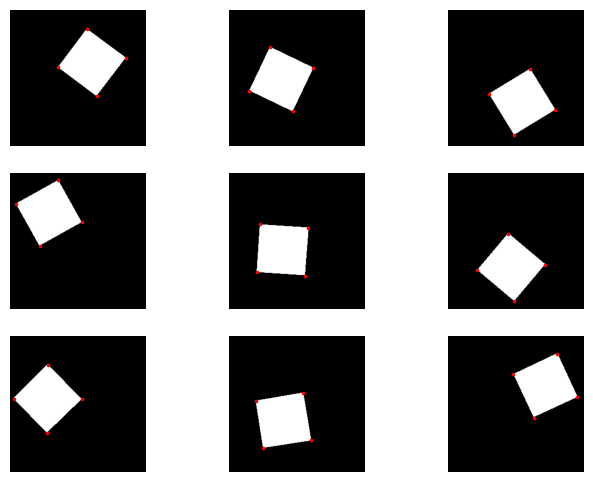

In [8]:
dls.show_batch(max_n=9, figsize=(8,6))

In [21]:
learn = vision_learner(dls, models.resnet50, y_range=(-1,1), pretrained=False)

In [22]:
learn.lr_find()

KeyboardInterrupt: 

In [20]:
learn.fine_tune(10, 0.0008317637839354575)

epoch,train_loss,valid_loss,time
0,0.501019,0.523424,02:41


epoch,train_loss,valid_loss,time
0,0.418496,0.538468,03:26
1,0.406614,0.521328,03:35


KeyboardInterrupt: 

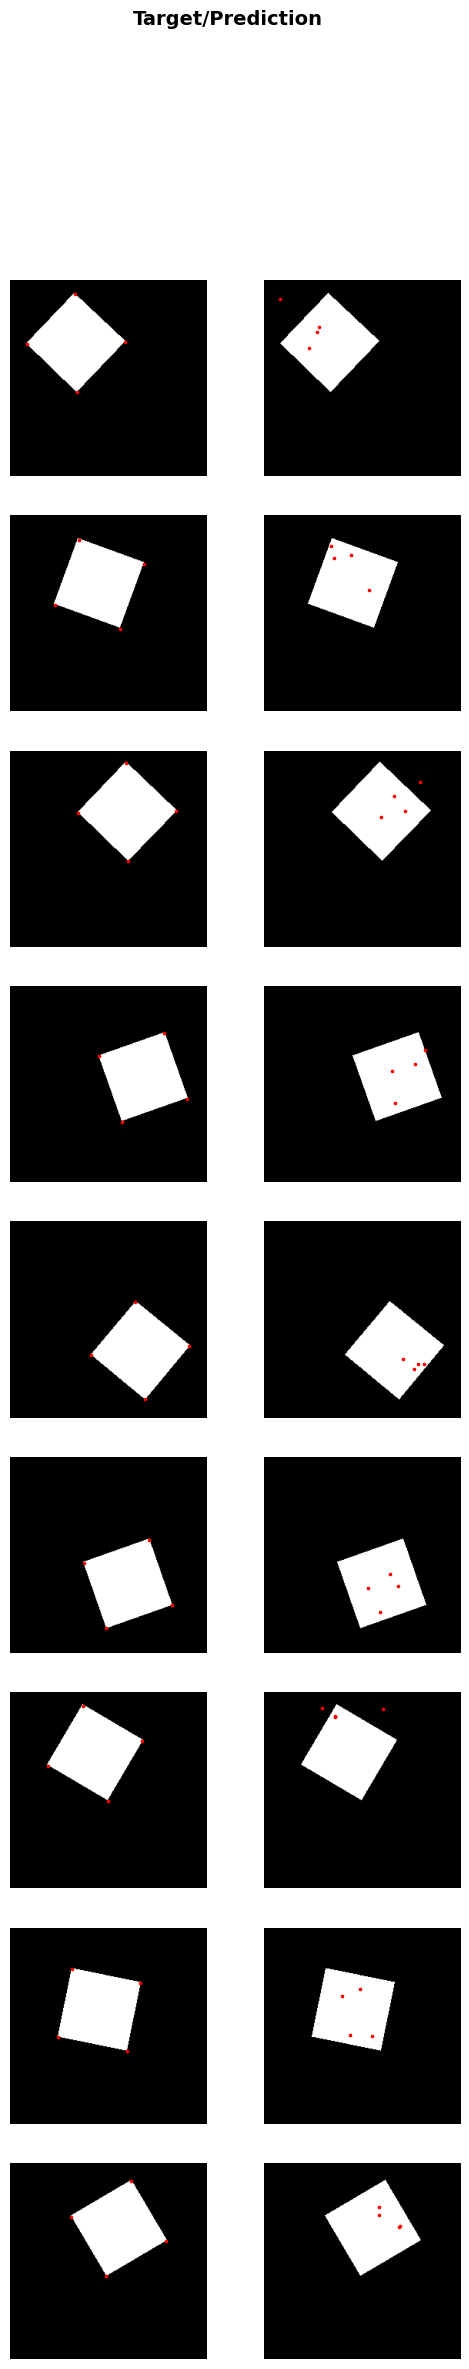

In [17]:
learn.show_results()


In [ ]:
learn.predict(dsets[12][0])

In [ ]:
dsets[12][1]